# Model Building

In this notebook, we will train several machine learning models to predict customer churn. We will use **MLflow** to track our experiments, including parameters and metrics.

## Models to Train:
1. Logistic Regression
2. Random Forest Classifier
3. XGBoost Classifier
4. LightGBM Classifier

In [1]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import mlflow.lightgbm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Set pandas display options
pd.set_option('display.max_columns', None)

## 1. Load Processed Data

In [2]:
data_path = '../data/processed'

X_train = pd.read_csv(f'{data_path}/train_processed.csv')
X_val = pd.read_csv(f'{data_path}/val_processed.csv')

y_train = X_train.pop('Churn')
y_val = X_val.pop('Churn')

print(f"Train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Val shape: {X_val.shape}, y_val shape: {y_val.shape}")

Train shape: (4225, 46), y_train shape: (4225,)
Val shape: (1409, 46), y_val shape: (1409,)


## 2. Setup MLflow

We will set the tracking URI to `http://localhost:5000` and define the experiment name.

In [4]:
tracking_uri = "http://localhost:5000"
mlflow.set_tracking_uri(tracking_uri)
mlflow.set_experiment("Customer Churn Prediction")

print(f"MLflow tracking URI: {tracking_uri}")

2025/12/10 14:59:10 INFO mlflow.tracking.fluent: Experiment with name 'Customer Churn Prediction' does not exist. Creating a new experiment.


MLflow tracking URI: http://localhost:5000


## 3. Model Training & Tracking Loop

In [5]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1)
}

results = []

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        print(f"Training {model_name}...")
        
        # Fit model
        model.fit(X_train, y_train)
        
        # Predict
        y_pred = model.predict(X_val)
        y_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None
        
        # Metrics
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        auc = roc_auc_score(y_val, y_prob) if y_prob is not None else None
        
        # Log params and metrics
        mlflow.log_param("model_type", model_name)
        mlflow.log_params(model.get_params())
        
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        if auc:
            mlflow.log_metric("roc_auc", auc)
            
        # Log model
        mlflow.sklearn.log_model(model, "model")
        
        print(f"{model_name} - Accuracy: {accuracy:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")
        
        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "AUC": auc
        })

2025/12/10 14:59:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Training Logistic Regression...


2025/12/10 14:59:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


Logistic Regression - Accuracy: 0.8027, F1: 0.5900, AUC: 0.8360
🏃 View run Logistic Regression at: http://localhost:5000/#/experiments/713370634279866497/runs/6ec86ae84b6a4e189e99462a47428dcd
🧪 View experiment at: http://localhost:5000/#/experiments/713370634279866497
Training Random Forest...


2025/12/10 14:59:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/10 14:59:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


Random Forest - Accuracy: 0.7800, F1: 0.5274, AUC: 0.8108
🏃 View run Random Forest at: http://localhost:5000/#/experiments/713370634279866497/runs/d764c2f1337c456fa70fe24079a8dadd
🧪 View experiment at: http://localhost:5000/#/experiments/713370634279866497
Training XGBoost...


e:\ml_projects\Customer-Churn-Prediction-\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:59:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025/12/10 14:59:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/10 14:59:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


XGBoost - Accuracy: 0.7722, F1: 0.5230, AUC: 0.8117
🏃 View run XGBoost at: http://localhost:5000/#/experiments/713370634279866497/runs/5520e5617bba444f90e9e8dbedc56fd0
🧪 View experiment at: http://localhost:5000/#/experiments/713370634279866497
Training LightGBM...


2025/12/10 14:59:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/10 14:59:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


LightGBM - Accuracy: 0.7857, F1: 0.5493, AUC: 0.8238
🏃 View run LightGBM at: http://localhost:5000/#/experiments/713370634279866497/runs/ac59dbe7ceea4cfd84de6a46529a6dc2
🧪 View experiment at: http://localhost:5000/#/experiments/713370634279866497


## 4. Compare Results

Let's look at the performance comparison.

In [6]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="F1 Score", ascending=False, inplace=True)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.802697,0.657895,0.534759,0.589971,0.836006
3,LightGBM,0.785664,0.621622,0.491979,0.549254,0.823786
1,Random Forest,0.779986,0.613475,0.462567,0.527439,0.810840
2,XGBoost,0.772179,0.588629,0.470588,0.523031,0.811673


C:\Users\Future\AppData\Local\Temp\ipykernel_26000\3881421154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1 Score", y="Model", data=results_df, palette="viridis")


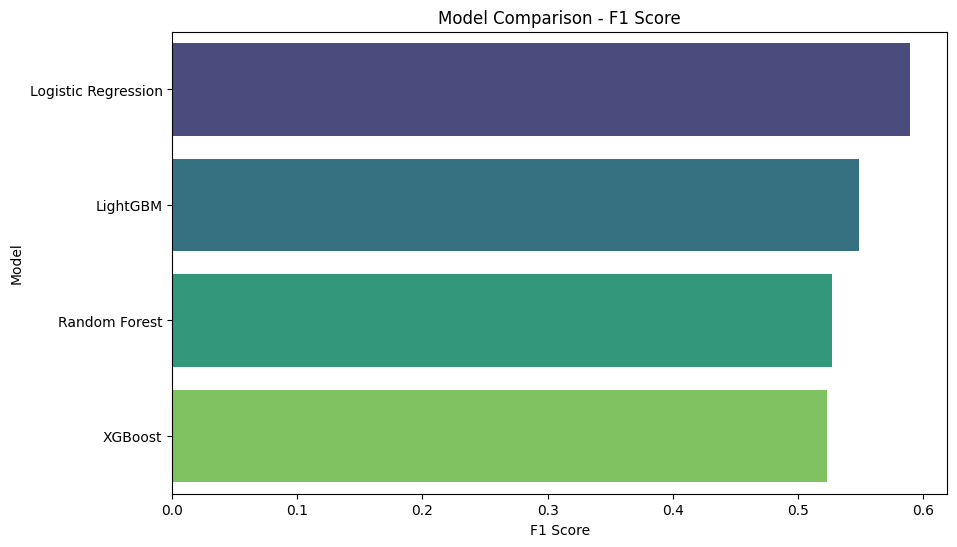

In [7]:
# Plot model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="F1 Score", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison - F1 Score")
plt.show()